In [19]:
import copy

import matplotlib
import numpy as np
from dm_control import viewer
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm import tqdm
from simulation.dm_control.ddpg.ddpg import DDPGagent, OUNoise
import simulation.dm_control.simulation_control.environments as environments

In [27]:
random_state = np.random.RandomState(42)

SAVE_VIDEOS = False
RESUME_TRAINING = True
PATH_MODEL = 'passive_hand'
NUM_EPISODES = 100
BATCH_SIZE = 128
DURATION = 100
ACTOR_LEARNING_RATE=1e-4
CRITIC_LEARNING_RATE=1e-3
GAMMA=0.99
TAU=1e-2

env = environments.load(domain_name='passive_hand', task_name='lift_sparse')
action_spec = env.action_spec()
dim_action = action_spec.shape[0]
dim_obs = 6

In [28]:
def parse_obs(obs):
    """
    Take only gripper position and object position???
    """
    # x = np.array([])
    # for k, v in obs.items():
    #     if k == 'simulation_time': continue
    #     x = np.append(x, v)
    # return x
    x = np.array([])
    x = np.append(x, obs['grip_pos'])
    x = np.append(x, obs['object_pos'])
    return x

agent = DDPGagent(
    dim_obs,
    dim_action,
    actor_learning_rate=ACTOR_LEARNING_RATE,
    critic_learning_rate=CRITIC_LEARNING_RATE,
    gamma=GAMMA,
    tau=TAU
)
if RESUME_TRAINING: agent.load(PATH_MODEL)
noise = OUNoise(dim_action, action_spec.minimum, action_spec.maximum)

def denorm(a): #  use on model output before passing to env
    act_k = (action_spec.maximum - action_spec.minimum) / 2.
    act_b = (action_spec.maximum + action_spec.minimum) / 2.
    return a * act_k + act_b

def norm(a): # use on env output before passing to model
    act_k_inv = 2. / (action_spec.maximum - action_spec.minimum)
    act_b = (action_spec.maximum + action_spec.minimum) / 2.
    return act_k_inv * (a - act_b)


In [29]:
def save_video(frames, path, framerate=30):
    height, width, _ = frames[0].shape
    dpi = 70
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')  # Switch to headless 'Agg' to inhibit figure rendering.
    fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
    matplotlib.use(orig_backend)  # Switch back to the original backend.
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
        im.set_data(frame)
        return [im]
    interval = 1000/framerate
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=interval, blit=True, repeat=False)
    anim.save(f'{path}.mp4', writer='ffmpeg')


  0%|          | 0/100 [00:00<?, ?it/s]c:\users\leeji\pycharmprojects\algorithms\venv\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\leeji\pycharmprojects\algorithms\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  1%|          | 1/100 [00:00<00:42,  2.31it/s]

episode: 0, reward: -32.17, average_reward: nan


  2%|▏         | 2/100 [00:01<01:23,  1.17it/s]

episode: 1, reward: -50.1, average_reward: -32.16797216128794


  3%|▎         | 3/100 [00:02<01:46,  1.10s/it]

episode: 2, reward: -42.0, average_reward: -41.135162053442635


  4%|▍         | 4/100 [00:04<02:00,  1.26s/it]

episode: 3, reward: -25.6, average_reward: -41.42205420181265


  5%|▌         | 5/100 [00:05<02:07,  1.34s/it]

episode: 4, reward: -28.13, average_reward: -37.465902202760816


  6%|▌         | 6/100 [00:07<02:11,  1.40s/it]

episode: 5, reward: -26.98, average_reward: -35.59822509140349


  7%|▋         | 7/100 [00:08<02:11,  1.42s/it]

episode: 6, reward: -25.05, average_reward: -34.16199640578563


  8%|▊         | 8/100 [00:10<02:10,  1.42s/it]

episode: 7, reward: -27.95, average_reward: -32.86012158928844


  9%|▉         | 9/100 [00:11<02:08,  1.41s/it]

episode: 8, reward: -27.59, average_reward: -32.24668407836753


 10%|█         | 10/100 [00:13<02:07,  1.41s/it]

episode: 9, reward: -22.63, average_reward: -31.728956891143486


 11%|█         | 11/100 [00:14<02:07,  1.43s/it]

episode: 10, reward: -17.92, average_reward: -30.81951370967217


 12%|█▏        | 12/100 [00:16<02:06,  1.43s/it]

episode: 11, reward: -21.25, average_reward: -29.39486133695761


 13%|█▎        | 13/100 [00:17<02:04,  1.43s/it]

episode: 12, reward: -21.18, average_reward: -26.50950711411848


 14%|█▍        | 14/100 [00:19<02:05,  1.46s/it]

episode: 13, reward: -20.0, average_reward: -24.4275566863523


 15%|█▌        | 15/100 [00:20<02:05,  1.47s/it]

episode: 14, reward: -20.14, average_reward: -23.867433374503385


 16%|█▌        | 16/100 [00:21<02:03,  1.47s/it]

episode: 15, reward: -31.25, average_reward: -23.06860592788384


 17%|█▋        | 17/100 [00:23<02:03,  1.48s/it]

episode: 16, reward: -15.88, average_reward: -23.49504116307825


 18%|█▊        | 18/100 [00:24<01:58,  1.45s/it]

episode: 17, reward: -35.84, average_reward: -22.57823922822194


 19%|█▉        | 19/100 [00:26<01:54,  1.41s/it]

episode: 18, reward: -60.08, average_reward: -23.366647920020696


 20%|██        | 20/100 [00:27<01:51,  1.40s/it]

episode: 19, reward: -54.22, average_reward: -26.615755088771486


 21%|██        | 21/100 [00:28<01:50,  1.40s/it]

episode: 20, reward: -64.37, average_reward: -29.774207213456787


 22%|██▏       | 22/100 [00:30<01:47,  1.38s/it]

episode: 21, reward: -57.88, average_reward: -34.418726683072336


 23%|██▎       | 23/100 [00:31<01:46,  1.38s/it]

episode: 22, reward: -32.39, average_reward: -38.08159109080724


 24%|██▍       | 24/100 [00:33<01:46,  1.40s/it]

episode: 23, reward: -72.67, average_reward: -39.203196783667295


 25%|██▌       | 25/100 [00:34<01:46,  1.42s/it]

episode: 24, reward: -47.91, average_reward: -44.470920099323266


 26%|██▌       | 26/100 [00:36<01:48,  1.47s/it]

episode: 25, reward: -55.85, average_reward: -47.247824239849564


 27%|██▋       | 27/100 [00:37<01:47,  1.48s/it]

episode: 26, reward: -44.97, average_reward: -49.708203377058936


 28%|██▊       | 28/100 [00:39<01:46,  1.47s/it]

episode: 27, reward: -69.67, average_reward: -52.617562418021876


 29%|██▉       | 29/100 [00:40<01:45,  1.48s/it]

episode: 28, reward: -63.78, average_reward: -56.00122681333804


 30%|███       | 30/100 [00:42<01:43,  1.49s/it]

episode: 29, reward: -35.13, average_reward: -56.37139364162258


 31%|███       | 31/100 [00:43<01:43,  1.50s/it]

episode: 30, reward: -46.56, average_reward: -54.46234150381285


 32%|███▏      | 32/100 [00:45<01:42,  1.51s/it]

episode: 31, reward: -34.06, average_reward: -52.681862466085605


 33%|███▎      | 33/100 [00:46<01:41,  1.52s/it]

episode: 32, reward: -38.07, average_reward: -50.300344604007485


 34%|███▍      | 34/100 [00:48<01:41,  1.54s/it]

episode: 33, reward: -28.96, average_reward: -50.86821644266656


 35%|███▌      | 35/100 [00:49<01:38,  1.51s/it]

episode: 34, reward: -53.81, average_reward: -46.49709794065031


 36%|███▌      | 36/100 [00:51<01:36,  1.50s/it]

episode: 35, reward: -106.42, average_reward: -47.08758859654871


 37%|███▋      | 37/100 [00:52<01:34,  1.50s/it]

episode: 36, reward: -118.19, average_reward: -52.144290122410254


 38%|███▊      | 38/100 [00:54<01:34,  1.52s/it]

episode: 37, reward: -34.87, average_reward: -59.46632305670962


 39%|███▉      | 39/100 [00:55<01:32,  1.51s/it]

episode: 38, reward: -26.02, average_reward: -55.98592306377545


 40%|████      | 40/100 [00:57<01:30,  1.50s/it]

episode: 39, reward: -23.57, average_reward: -52.20984608151086


 41%|████      | 41/100 [00:58<01:28,  1.51s/it]

episode: 40, reward: -24.82, average_reward: -51.05417413326746


 42%|████▏     | 42/100 [01:00<01:28,  1.52s/it]

episode: 41, reward: -22.7, average_reward: -48.87970875100412


 43%|████▎     | 43/100 [01:01<01:25,  1.49s/it]

episode: 42, reward: -70.06, average_reward: -47.743684980417626


 44%|████▍     | 44/100 [01:03<01:22,  1.47s/it]

episode: 43, reward: -25.13, average_reward: -50.9429636763375


 45%|████▌     | 45/100 [01:04<01:20,  1.46s/it]

episode: 44, reward: -27.15, average_reward: -50.56023733832635


 46%|████▌     | 46/100 [01:06<01:18,  1.46s/it]

episode: 45, reward: -22.51, average_reward: -47.89378952071469


 47%|████▋     | 47/100 [01:07<01:16,  1.45s/it]

episode: 46, reward: -23.2, average_reward: -39.503128106185535


 48%|████▊     | 48/100 [01:09<01:16,  1.47s/it]

episode: 47, reward: -51.09, average_reward: -30.003260565013825


 49%|████▉     | 49/100 [01:10<01:17,  1.51s/it]

episode: 48, reward: -17.67, average_reward: -31.625099398182396


 50%|█████     | 50/100 [01:12<01:16,  1.52s/it]

episode: 49, reward: -24.48, average_reward: -30.7905647058548


 51%|█████     | 51/100 [01:13<01:13,  1.51s/it]

episode: 50, reward: -15.09, average_reward: -30.881718325344263


 52%|█████▏    | 52/100 [01:15<01:12,  1.52s/it]

episode: 51, reward: -10.74, average_reward: -29.908776744248616


 53%|█████▎    | 53/100 [01:16<01:11,  1.51s/it]

episode: 52, reward: -14.48, average_reward: -28.71272038431828


 54%|█████▍    | 54/100 [01:18<01:10,  1.53s/it]

episode: 53, reward: -9.98, average_reward: -23.154322530763633


 55%|█████▌    | 55/100 [01:19<01:07,  1.50s/it]

episode: 54, reward: -27.98, average_reward: -21.638535668961588


 56%|█████▌    | 56/100 [01:21<01:06,  1.52s/it]

episode: 55, reward: -9.12, average_reward: -21.721417741803037


 57%|█████▋    | 57/100 [01:22<01:04,  1.49s/it]

episode: 56, reward: -17.49, average_reward: -20.38260714758907


 58%|█████▊    | 58/100 [01:24<01:02,  1.48s/it]

episode: 57, reward: -14.66, average_reward: -19.812447772594517


 59%|█████▉    | 59/100 [01:25<01:00,  1.48s/it]

episode: 58, reward: -13.5, average_reward: -16.169741328642598


 60%|██████    | 60/100 [01:27<00:59,  1.48s/it]

episode: 59, reward: -14.47, average_reward: -15.752784599913548


 61%|██████    | 61/100 [01:28<00:57,  1.49s/it]

episode: 60, reward: -17.05, average_reward: -14.751823475928934


 62%|██████▏   | 62/100 [01:30<00:56,  1.50s/it]

episode: 61, reward: -12.44, average_reward: -14.948226791982659


 63%|██████▎   | 63/100 [01:31<00:55,  1.49s/it]

episode: 62, reward: -12.24, average_reward: -15.118547346093473


 64%|██████▍   | 64/100 [01:33<00:54,  1.51s/it]

episode: 63, reward: -10.04, average_reward: -14.894800696102674


 65%|██████▌   | 65/100 [01:34<00:52,  1.51s/it]

episode: 64, reward: -9.29, average_reward: -14.901477358932345


 66%|██████▌   | 66/100 [01:36<00:50,  1.49s/it]

episode: 65, reward: -13.0, average_reward: -13.032266477272676


 67%|██████▋   | 67/100 [01:37<00:49,  1.50s/it]

episode: 66, reward: -8.86, average_reward: -13.420212488652913


 68%|██████▊   | 68/100 [01:39<00:48,  1.51s/it]

episode: 67, reward: -11.05, average_reward: -12.556334737460633


 69%|██████▉   | 69/100 [01:40<00:41,  1.34s/it]

Physics Error: [-0.61809054  0.24109718 -0.01346144  1.         -0.35920124]
episode: 68, reward: -8.91, average_reward: -12.195117619346767


 70%|███████   | 70/100 [01:41<00:41,  1.39s/it]

episode: 69, reward: -10.43, average_reward: -11.735284121280817


 71%|███████   | 71/100 [01:43<00:41,  1.42s/it]

episode: 70, reward: -9.76, average_reward: -11.330548828978776


 72%|███████▏  | 72/100 [01:44<00:40,  1.46s/it]

episode: 71, reward: -10.08, average_reward: -10.600907817029453


 73%|███████▎  | 73/100 [01:46<00:39,  1.48s/it]

episode: 72, reward: -11.48, average_reward: -10.364399596837078


 74%|███████▍  | 74/100 [01:47<00:38,  1.48s/it]

episode: 73, reward: -9.08, average_reward: -10.288222852217055


 75%|███████▌  | 75/100 [01:49<00:36,  1.47s/it]

episode: 74, reward: -19.75, average_reward: -10.19155761341922


 76%|███████▌  | 76/100 [01:50<00:35,  1.46s/it]

episode: 75, reward: -19.65, average_reward: -11.237572244514146


 77%|███████▋  | 77/100 [01:51<00:33,  1.45s/it]

episode: 76, reward: -32.35, average_reward: -11.902341750991226


 78%|███████▊  | 78/100 [01:53<00:31,  1.44s/it]

episode: 77, reward: -16.29, average_reward: -14.251848922299335


 79%|███████▉  | 79/100 [01:54<00:30,  1.45s/it]

episode: 78, reward: -14.65, average_reward: -14.77581366513769


 80%|████████  | 80/100 [01:56<00:29,  1.47s/it]

episode: 79, reward: -10.09, average_reward: -15.349983126563762


 81%|████████  | 81/100 [01:57<00:28,  1.49s/it]

episode: 80, reward: -8.15, average_reward: -15.315871599761724


 82%|████████▏ | 82/100 [01:59<00:26,  1.48s/it]

episode: 81, reward: -11.17, average_reward: -15.155448551366703


 83%|████████▎ | 83/100 [02:00<00:25,  1.51s/it]

episode: 82, reward: -6.95, average_reward: -15.264131049558307


 84%|████████▍ | 84/100 [02:02<00:24,  1.53s/it]

episode: 83, reward: -4.6, average_reward: -14.811224966386835


 85%|████████▌ | 85/100 [02:04<00:22,  1.52s/it]

episode: 84, reward: -8.95, average_reward: -14.363326454973294


 86%|████████▌ | 86/100 [02:05<00:21,  1.53s/it]

episode: 85, reward: -7.93, average_reward: -13.28404845336903


 87%|████████▋ | 87/100 [02:07<00:20,  1.54s/it]

episode: 86, reward: -7.35, average_reward: -12.111943397863396


 88%|████████▊ | 88/100 [02:08<00:18,  1.51s/it]

episode: 87, reward: -19.45, average_reward: -9.61169874842823


 89%|████████▉ | 89/100 [02:10<00:16,  1.52s/it]

episode: 88, reward: -10.67, average_reward: -9.928003701752013


 90%|█████████ | 90/100 [02:11<00:15,  1.53s/it]

episode: 89, reward: -8.2, average_reward: -9.530694434861726


 91%|█████████ | 91/100 [02:13<00:13,  1.52s/it]

episode: 90, reward: -10.57, average_reward: -9.342001474057449


 92%|█████████▏| 92/100 [02:14<00:12,  1.52s/it]

episode: 91, reward: -14.07, average_reward: -9.583959300432879


 93%|█████████▎| 93/100 [02:16<00:10,  1.53s/it]

episode: 92, reward: -9.48, average_reward: -9.874166169733718


 94%|█████████▍| 94/100 [02:17<00:09,  1.56s/it]

episode: 93, reward: -8.9, average_reward: -10.127178650064945


 95%|█████████▌| 95/100 [02:19<00:07,  1.60s/it]

episode: 94, reward: -4.59, average_reward: -10.557796292435249


 96%|█████████▌| 96/100 [02:21<00:06,  1.58s/it]

episode: 95, reward: -12.36, average_reward: -10.121037280121692


 97%|█████████▋| 97/100 [02:22<00:04,  1.58s/it]

episode: 96, reward: -4.69, average_reward: -10.564095789223


 98%|█████████▊| 98/100 [02:24<00:03,  1.57s/it]

episode: 97, reward: -7.33, average_reward: -10.297980180067968


 99%|█████████▉| 99/100 [02:25<00:01,  1.56s/it]

episode: 98, reward: -8.8, average_reward: -9.086109782636973


100%|██████████| 100/100 [02:27<00:00,  1.47s/it]

episode: 99, reward: -6.64, average_reward: -8.89909404239631


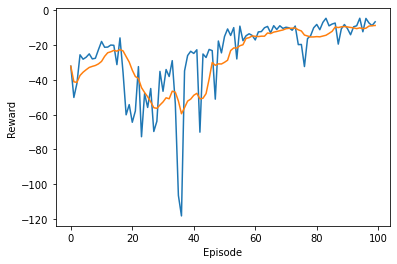

In [23]:
frames = []
rewards = []
avg_rewards = []

for episode in tqdm(range(NUM_EPISODES)):
    frames.clear()

    time_step = env.reset()
    state = parse_obs(time_step.observation)
    noise.reset()
    episode_reward = 0
    episode_reward_history = []
    for step in range(DURATION):
        if SAVE_VIDEOS:
            camera0 = env.physics.render(camera_id=3, height=200, width=200)
            frames.append(np.hstack((camera0,)))


        action = agent.get_action(state)
        action = noise.get_action(action, step)
        try:
            time_step_2 = env.step(denorm(action))
        except:
            print(f'Physics Error: {action}')
            break
        state_2 = parse_obs(time_step_2.observation)
        reward = time_step_2.reward
        agent.memory.push(state, action, reward, state_2, -1)
        state = state_2
        if len(agent.memory) > BATCH_SIZE:
            agent.update(BATCH_SIZE)
        episode_reward += reward
        episode_reward_history.append(reward)
    if SAVE_VIDEOS:
        dest = f'ep{episode}_rew{int(episode_reward)}'
        with open('history.txt', 'a') as f:
            f.write(f'{dest}\n{str(episode_reward_history)}\n')
        save_video(frames, f'ep{episode}_rew{int(episode_reward)}', framerate=1./env.control_timestep())
    print(f"episode: {episode}, "
      f"reward: {np.round(episode_reward, decimals=2)}, "
      f"average_reward: {np.mean(rewards[-10:])}")
    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

agent.save(PATH_MODEL)

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [31]:
def memory_policy():
    t = 0
    def policy(time_step):
        nonlocal t
        state = parse_obs(time_step.observation)
        action = agent.get_action(state)
        action = noise.get_action(action, t)
        action = denorm(action)
        t += 1
        return action
    return policy
policy = memory_policy()
viewer.launch(env, policy=policy)

In [12]:

# #@title Loading and simulating a `suite` task{vertical-output: true}
#
# # Load the environment
# # random_state = np.random.RandomState(42)
# # env = suite.load('hopper', 'stand', task_kwargs={'random': random_state})
#
# # Simulate episode with random actions
# duration = 10  # Seconds
# frames = []
# ticks = []
# rewards = []
# observations = []
#
# spec = env.action_spec()
# time_step = env.reset()
#
# while env.physics.data.time < duration:
#     # action = random_state.uniform(spec.minimum, spec.maximum, spec.shape)
#     action = agent.get_action(state)
#     action = denorm(action)
#
#     time_step = env.step(action)
#
#     camera0 = env.physics.render(camera_id=3, height=200, width=200)
#     # camera1 = env.physics.render(camera_id=3, height=500, width=500)
#     frames.append(np.hstack((camera0,)))
#     rewards.append(time_step.reward)
#     observations.append(copy.deepcopy(time_step.observation))
#     ticks.append(env.physics.data.time)
#
# save_video(frames, 'lmao', framerate=1./env.control_timestep())

# Show video and plot reward and observations
# num_sensors = len(time_step.observation)
#
# _, ax = plt.subplots(1 + num_sensors, 1, sharex=True, figsize=(4, 8))
# ax[0].plot(ticks, rewards)
# ax[0].set_ylabel('reward')
# ax[-1].set_xlabel('time')
#
# for i, key in enumerate(time_step.observation):
#   data = np.asarray([observations[j][key] for j in range(len(observations))])
#   ax[i+1].plot(ticks, data, label=key)
#   ax[i+1].set_ylabel(key)

PhysicsError: Physics state is invalid. Warning(s) raised: mjWARN_BADQACC